<a href="https://colab.research.google.com/github/Chominseo99/deeplearning/blob/main/Lesson1_ms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 이미지 로드

In [3]:
!pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

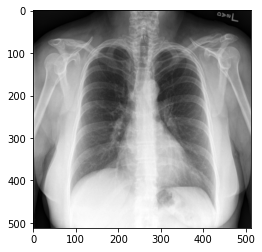

In [11]:
image = cv2.imread('/content/drive/MyDrive/Deepnoid_deeplearning/lesson1_image/100_IM-0002-1001_invert.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.show()

In [14]:
type(image)

numpy.ndarray

In [16]:
image.shape

(512, 512)

In [18]:
image

array([[28, 19, 14, ..., 15, 15, 15],
       [25, 19, 15, ..., 15, 15, 15],
       [25, 19, 15, ..., 15, 15, 15],
       ...,
       [34, 27, 22, ..., 17, 17, 17],
       [35, 28, 22, ..., 17, 17, 17],
       [35, 28, 22, ..., 17, 17, 17]], dtype=uint8)

## preprocessing 

1. GaussianBlur

자주 사용되는 블러 함수로 가우시안 분포를 사용하는 가우시안 블러(GaussianBlur)가 있다. GaussianBlur() 함수의 세 번째 매개변수는 X축(너비) 방향의 표준편차이며, 0으로 지정하면 ((너비-1)0.5-1)0.3+0.8과 같이 계산된다.

Text(0.5, 1.0, 'GaussianBlur Image')

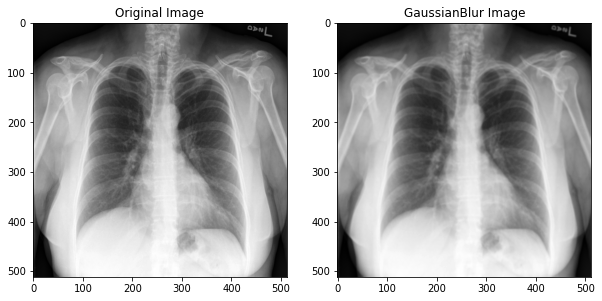

In [27]:
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) 

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_very_blurry, cmap='gray')
ax[1].set_title('GaussianBlur Image')

2. sharp

대상 픽셀을 강조하는 커널을 정의한 후 filter2D() 메소드를 사용하여 이미지에 적용한다.

Text(0.5, 1.0, 'Sharp Image')

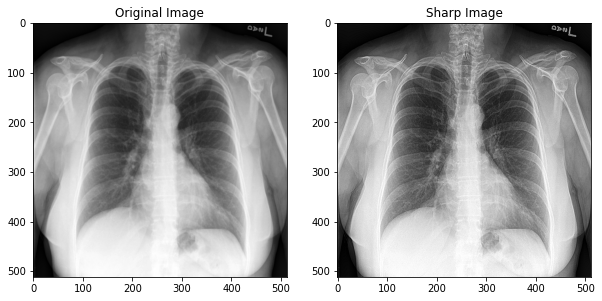

In [23]:
image = cv2.imread('/content/drive/MyDrive/Deepnoid_deeplearning/lesson1_image/100_IM-0002-1001_invert.png', cv2.IMREAD_GRAYSCALE)

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

3. Histogram Equalization

히스토그램 평활화(Histogram Equalization)은 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구이며, OpenCV에서는 equalizeHist() 메소드를 통해 적용할 수 있다.

Text(0.5, 1.0, 'Enhanced Image')

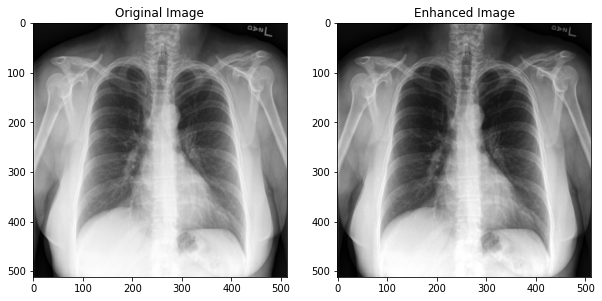

In [24]:
image = cv2.imread('/content/drive/MyDrive/Deepnoid_deeplearning/lesson1_image/100_IM-0002-1001_invert.png', cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

4. Canny

Canny()메소드를 활용하여 경계선을 감지 할 수 있다. Canny()메소드는 그래디언트 임곗값 사이의 저점과 고점을 나타내는 두 매개변수를 필요로 하며, 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주하고, 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주한다.

In [25]:
image_gray = cv2.imread('/content/drive/MyDrive/Deepnoid_deeplearning/lesson1_image/100_IM-0002-1001_invert.png', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

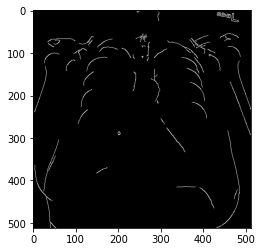

In [26]:
# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()